# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('IDataset2.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Explosive type     588 non-null    object 
 1   Explosive mass     588 non-null    float64
 2   Standoff distance  588 non-null    float64
 3   Impulse            588 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.5+ KB


### Importing the dataset

In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explosive mass                588 non-null    float64
 1   Standoff distance             588 non-null    float64
 2   Impulse                       588 non-null    float64
 3   Explosive type_Composition B  588 non-null    uint8  
 4   Explosive type_TNT            588 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 15.1 KB


In [4]:
dataset.head()

,Explosive mass,Standoff distance,Impulse,Explosive type_Composition B,Explosive type_TNT
0,0.5,1.0,77.067900,0,1
1,0.5,1.5,58.168617,0,1
2,0.5,2.5,38.798874,0,1
3,0.5,3.5,28.473915,0,1
4,0.5,4.5,22.343452,0,1


In [5]:
y = dataset['Impulse']
X = dataset.drop('Impulse', axis=1)
print(X.shape, y.shape)

(588, 4) (588,)


In [6]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=300, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=175, activation='relu'))

### Adding the third hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### what model looks like

In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1500      
                                                                 
 dense_1 (Dense)             (None, 175)               52675     
                                                                 
 dense_2 (Dense)             (None, 50)                8800      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 63026 (246.20 KB)
Trainable params: 63026 (246.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
from tensorflow.keras.optimizers import Nadam
opt = Nadam(learning_rate=0.001)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### early stopping callback

In [15]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [16]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=550,
                    batch_size=20,
                    verbose=1)

Epoch 1/550
21/21 [==============================] - 2s 16ms/step - loss: 18798.9922 - mae: 97.4743 - val_loss: 12039.2617 - val_mae: 65.8462
Epoch 2/550
21/21 [==============================] - 0s 6ms/step - loss: 10034.9971 - mae: 68.0957 - val_loss: 6813.2920 - val_mae: 62.1996
Epoch 3/550
21/21 [==============================] - 0s 6ms/step - loss: 6708.2969 - mae: 58.2748 - val_loss: 4144.2222 - val_mae: 41.7912
Epoch 4/550
21/21 [==============================] - 0s 6ms/step - loss: 4436.0142 - mae: 47.5867 - val_loss: 2955.1978 - val_mae: 40.4772
Epoch 5/550
21/21 [==============================] - 0s 5ms/step - loss: 3200.7700 - mae: 40.5682 - val_loss: 2306.8586 - val_mae: 33.3889
Epoch 6/550
21/21 [==============================] - 0s 5ms/step - loss: 2586.6414 - mae: 34.2363 - val_loss: 1962.7568 - val_mae: 29.4633
Epoch 7/550
21/21 [==============================] - 0s 5ms/step - loss: 2211.6951 - mae: 31.3244 - val_loss: 1763.3785 - val_mae: 27.1044
Epoch 8/550
21/21 [====

### Predicting the results of the Test set

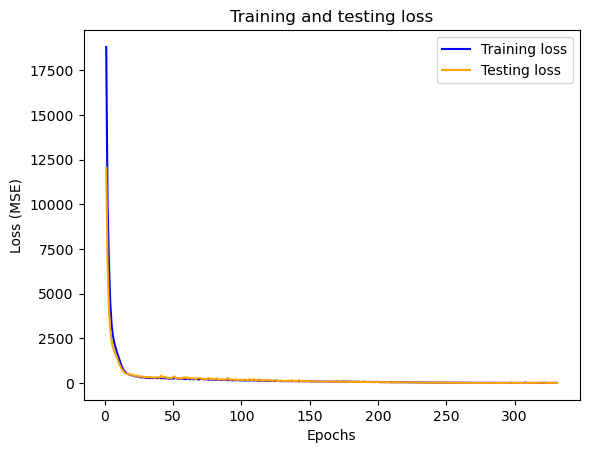

In [17]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

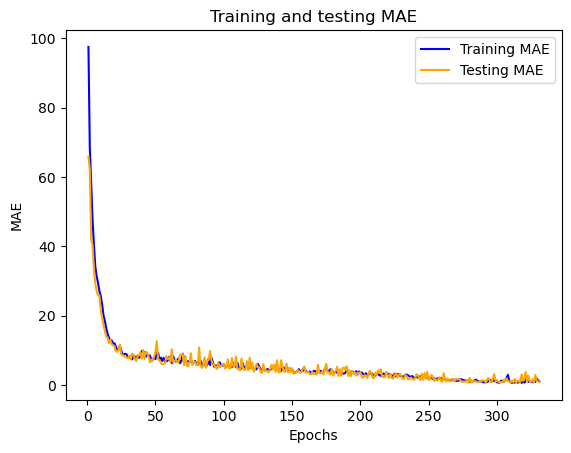

In [18]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Testing MAE')
plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

3/3 [==============================] - 0s 5ms/step


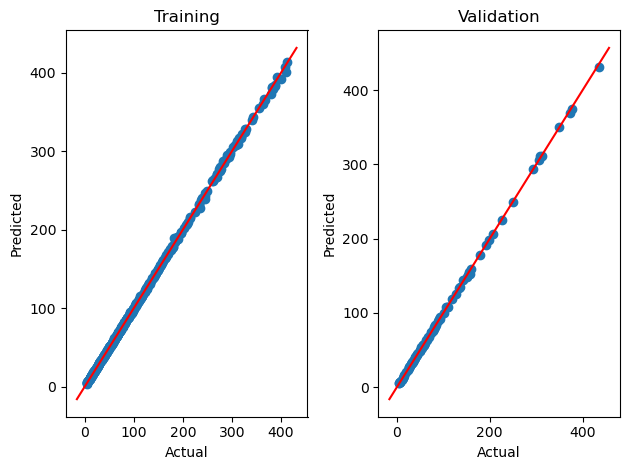

In [19]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=ann.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [20]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 3ms/step
[[ 89.21  88.66]
 [ 50.23  50.51]
 [431.75 435.33]
 [  9.69   9.78]
 [ 36.94  37.06]
 [ 81.25  80.66]
 [  7.08   6.33]
 [ 25.04  25.14]
 [ 81.22  81.96]
 [ 53.32  51.24]
 [ 23.06  23.23]
 [ 32.52  32.69]
 [293.22 293.22]
 [ 56.53  55.99]
 [  6.65   5.75]
 [ 39.17  39.55]
 [350.62 348.46]
 [151.83 157.31]
 [154.59 155.25]
 [ 42.23  41.99]
 [ 49.01  49.47]
 [ 57.28  57.89]
 [206.61 206.68]
 [369.25 372.33]
 [249.84 250.9 ]
 [ 28.28  28.48]
 [ 49.12  48.82]
 [ 26.73  26.86]
 [ 34.13  33.72]
 [311.22 308.69]
 [ 84.07  84.28]
 [ 12.22  12.65]
 [191.13 191.8 ]
 [ 39.88  39.6 ]
 [ 35.26  34.96]
 [ 91.74  92.37]
 [ 94.41  93.74]
 [148.78 150.67]
 [ 92.16  91.1 ]
 [ 78.65  78.77]
 [ 72.65  72.83]
 [ 55.99  56.02]
 [ 26.58  26.87]
 [134.15 135.3 ]
 [125.05 126.15]
 [306.27 305.8 ]
 [ 53.11  53.85]
 [  6.55   5.86]
 [ 57.16  58.15]
 [ 30.98  31.12]
 [108.08 105.45]
 [ 67.01  67.  ]
 [ 12.27  12.09]
 [  7.03   6.63]
 [ 43.86  44.1 ]
 [158.81 160.2

Text(0, 0.5, 'Predicted data')

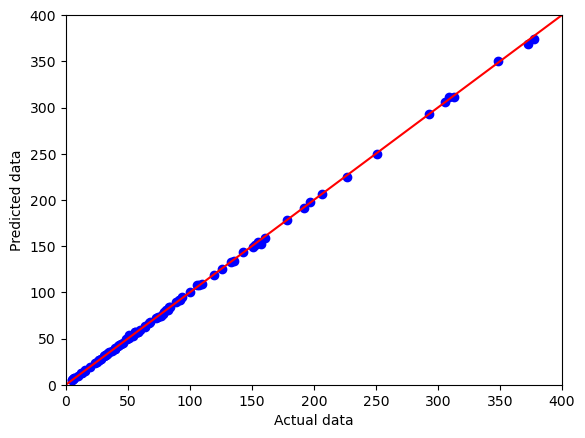

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,400],[0,400], color = "red")
plt.axis ([0,400,0,400])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

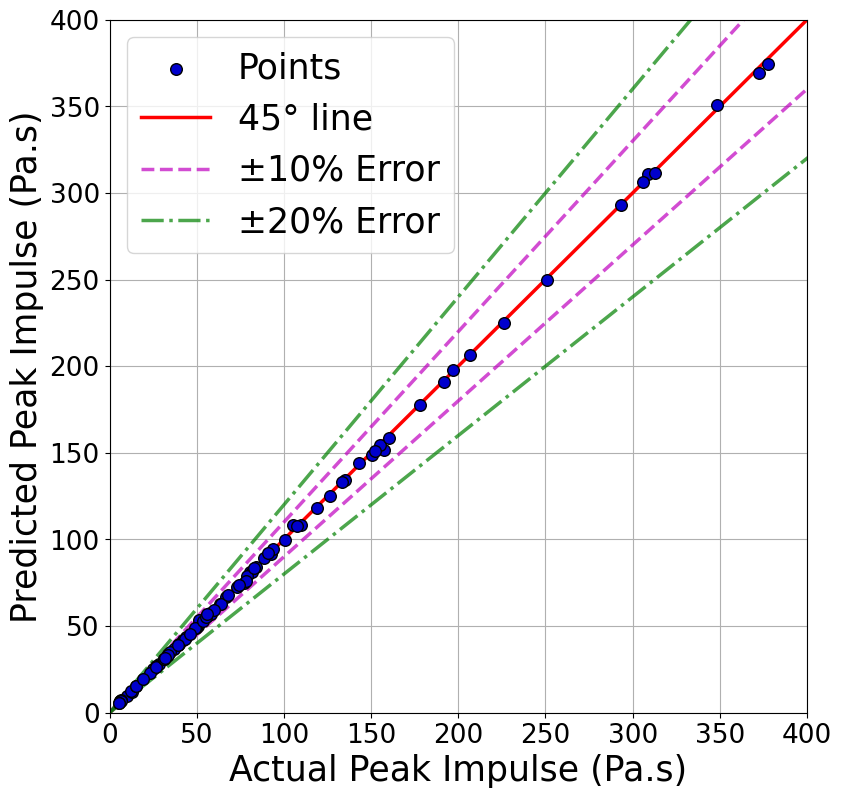

In [22]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [ ]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

In [ ]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

In [ ]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

In [ ]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")